___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

The domain you must have remembered it because you are worked on under project **"EDA for Car Price Prediction Model"**. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will use the data sets prepared for algorithms as a result of the EDA project.

So this study assumes that you are working on the EDA project and that you have sufficient domain knowledge.

Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this case, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression, Random Forest*** and ***XG Boost*** algorithms respectively. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 

## 1. Import Modules, Load Data and Data Review

In [1]:

import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_pickle("golden_data_dummy.pkl")

In [3]:

df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [4]:
df.shape

(14990, 136)

In [5]:
df.corr()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
displacement,1.000000,0.608069,0.306380,0.039455,0.219180,0.256791,0.075198,0.284346,0.008668,0.011990,...,0.101407,0.647354,-0.004512,-0.643471,-0.027935,-0.036014,-0.002039,-0.089162,-0.104255,0.132912
hp,0.608069,1.000000,0.013735,-0.025535,0.252995,0.331149,0.040451,0.433349,-0.026401,-0.048050,...,0.094190,0.111304,0.009755,-0.107138,-0.034652,0.111306,-0.016734,0.067898,-0.036446,-0.057641
km,0.306380,0.013735,1.000000,0.003092,0.046383,0.007789,0.106760,-0.018739,-0.015460,0.077596,...,0.032341,0.428175,0.002026,-0.433719,0.045312,-0.180433,-0.100492,-0.217220,-0.280735,0.442080
ss_abs,0.039455,-0.025535,0.003092,1.000000,0.043162,0.040839,-0.031936,0.046580,0.248538,0.070964,...,-0.042177,0.019120,-0.023786,-0.020374,0.014457,0.013637,0.021455,0.005178,0.030786,-0.041733
ss_adaptive_cruise_control,0.219180,0.252995,0.046383,0.043162,1.000000,0.202003,0.255668,0.316794,0.037572,0.104905,...,0.239071,0.092960,0.017857,-0.102319,0.071671,0.048770,0.031647,-0.020815,-0.008863,-0.026030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
type_Demonstration,-0.036014,0.111306,-0.180433,0.013637,0.048770,0.043205,-0.058861,0.106895,0.031162,-0.052810,...,-0.025849,-0.123895,-0.002695,0.125743,-0.014668,1.000000,-0.062618,-0.055877,-0.073438,-0.390428
type_Employee's car,-0.002039,-0.016734,-0.100492,0.021455,0.031647,0.022449,-0.017133,0.013814,0.051146,-0.007933,...,-0.018475,0.003158,-0.003100,-0.002038,-0.008357,-0.062618,1.000000,-0.064264,-0.084460,-0.449029
type_New,-0.089162,0.067898,-0.217220,0.005178,-0.020815,0.028177,-0.024663,0.051672,0.003759,-0.055720,...,-0.017066,-0.163772,-0.002766,0.164474,-0.005645,-0.055877,-0.064264,1.000000,-0.075368,-0.400694
type_Pre-registered,-0.104255,-0.036446,-0.280735,0.030786,-0.008863,-0.019357,-0.019540,0.027960,0.066428,-0.018862,...,-0.033124,-0.137841,-0.003636,0.136149,0.013701,-0.073438,-0.084460,-0.075368,1.000000,-0.526618


In [6]:
df.price.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

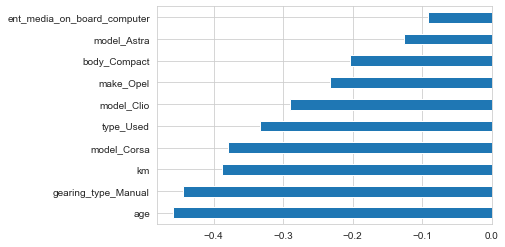

In [8]:
sns.set_style('whitegrid')
df.corr()["price"].sort_values().head(10).plot.barh()

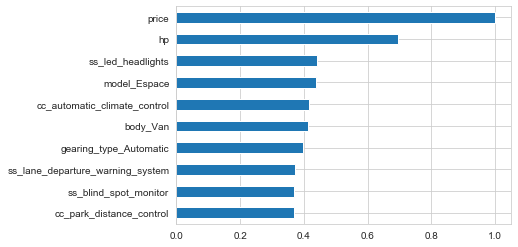

In [9]:
df.corr()["price"].sort_values().tail(10).plot.barh()

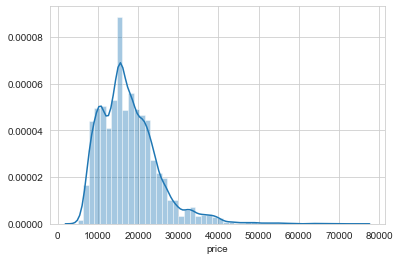

In [10]:
sns.distplot(df.price)

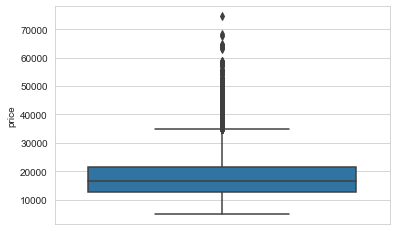

In [11]:

sns.boxplot(df.price, orient="v")

In [12]:

X=df.drop(["price"], axis=1)

In [13]:
y=df["price"]

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [14]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:

X.shape

(14990, 135)

In [16]:
X_train.shape

(11992, 135)

In [17]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred = lm.predict(X_test)

In [21]:
eval_metrics(y_test,y_pred)

r2_score: 0.8917673810996833 
 mae: 1672.3867626669671 
 mse: 5481554.524313098 
 rmse: 2341.271988538089


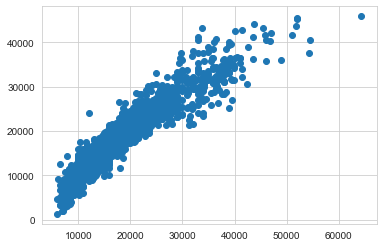

In [22]:
plt.scatter(y_test, y_pred)

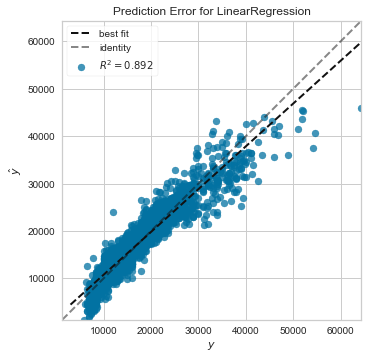

In [23]:

from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

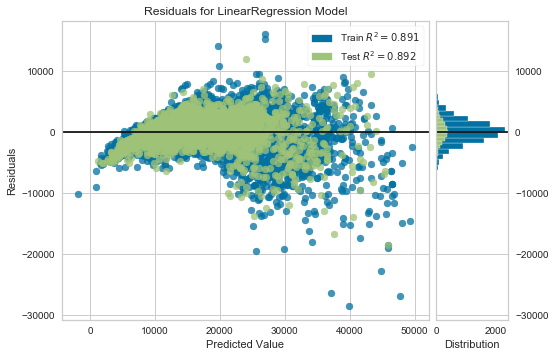

In [24]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [25]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [26]:
compare.sample(10)

,Actual,Pred
3901,20900,20905.113897
3296,15980,14418.277489
10758,11650,15880.791114
4856,20799,23114.649694
8835,13890,13739.430146
5078,26950,24020.261682
9839,9800,9635.141246
2913,15450,14580.196225
6772,12990,12255.564408
1411,15960,15297.039350


In [27]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train)
cv_scores.mean()

0.8853675809888802

In [28]:
cv_scores

array([0.88213508, 0.88024083, 0.89031947, 0.88202718, 0.89211535])

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [29]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [30]:
ridge_model=Ridge(normalize=True)


In [31]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [32]:
y_pred=ridge_model.predict(X_test)

In [33]:
eval_metrics(y_test, y_pred)

r2_score: 0.8390485500575235 
 mae: 1963.3528962238236 
 mse: 8151555.026488906 
 rmse: 2855.092822744806


In [34]:
alpha_space = np.linspace(0.1, 20, 50)

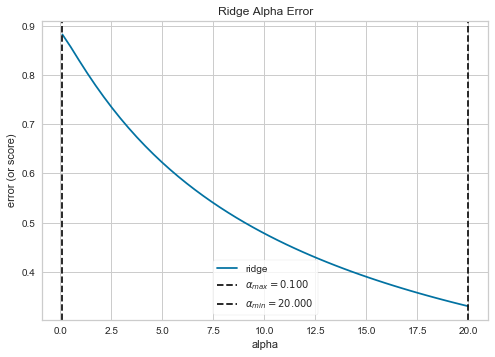

In [36]:

from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = alpha_space 

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)

visualizer.fit(X_train, y_train)
visualizer.show()

In [39]:
ridge_model = Ridge(0.1, normalize=True).fit(X_train, y_train) #ALPHA 0.1
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8908685496674182 
 mae: 1663.8811495596701 
 mse: 5527076.785108294 
 rmse: 2350.973582392685


In [40]:
ridge_model = Ridge(0.01, normalize=True).fit(X_train, y_train) #ALPHA 0.01
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8920596063211059 
 mae: 1668.797719412939 
 mse: 5466754.471418852 
 rmse: 2338.1091658472346


In [42]:
ridge_model = Ridge(17, normalize=True).fit(X_train, y_train) # As we increase ALPHA value, r'2_score value decreases
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.3771380448042705 
 mae: 4257.2777947892555 
 mse: 31545497.12661219 
 rmse: 5616.5378238388275


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [43]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [44]:
lasso_model = Lasso(normalize=True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8840377602740636 
 mae: 1698.8273169126867 
 mse: 5873029.279690901 
 rmse: 2423.4333660513344


In [45]:

alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, normalize=True, cv = 5).fit(X_train, y_train)

In [47]:
lasso_cv_model.alpha_

0.1

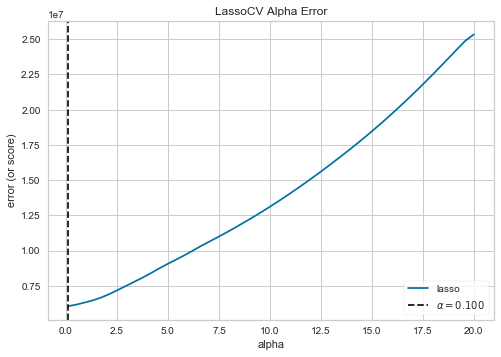

In [48]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = alpha_space

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [49]:
lasso_model = Lasso(0.1, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)


r2_score: 0.8917796626649902 
 mae: 1668.1568590125219 
 mse: 5480932.511554304 
 rmse: 2341.1391482682748


In [50]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

In [51]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

113

In [52]:

lasso_model = Lasso(10, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.7303519997650454 
 mae: 2681.5807547157997 
 mse: 13656605.842839578 
 rmse: 3695.4845207143785


In [53]:

# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

8

In [54]:
significant_features.sort_values(by="coef", ascending=False)

,features,coef
99,model_Espace,3220.399998
90,make_Audi,2155.137499
21,ss_led_headlights,209.583059
51,cc_automatic_climate_control,139.795730
1,hp,129.370194
2,km,-0.013474
124,gearing_type_Manual,-685.951999
34,age,-1449.178638


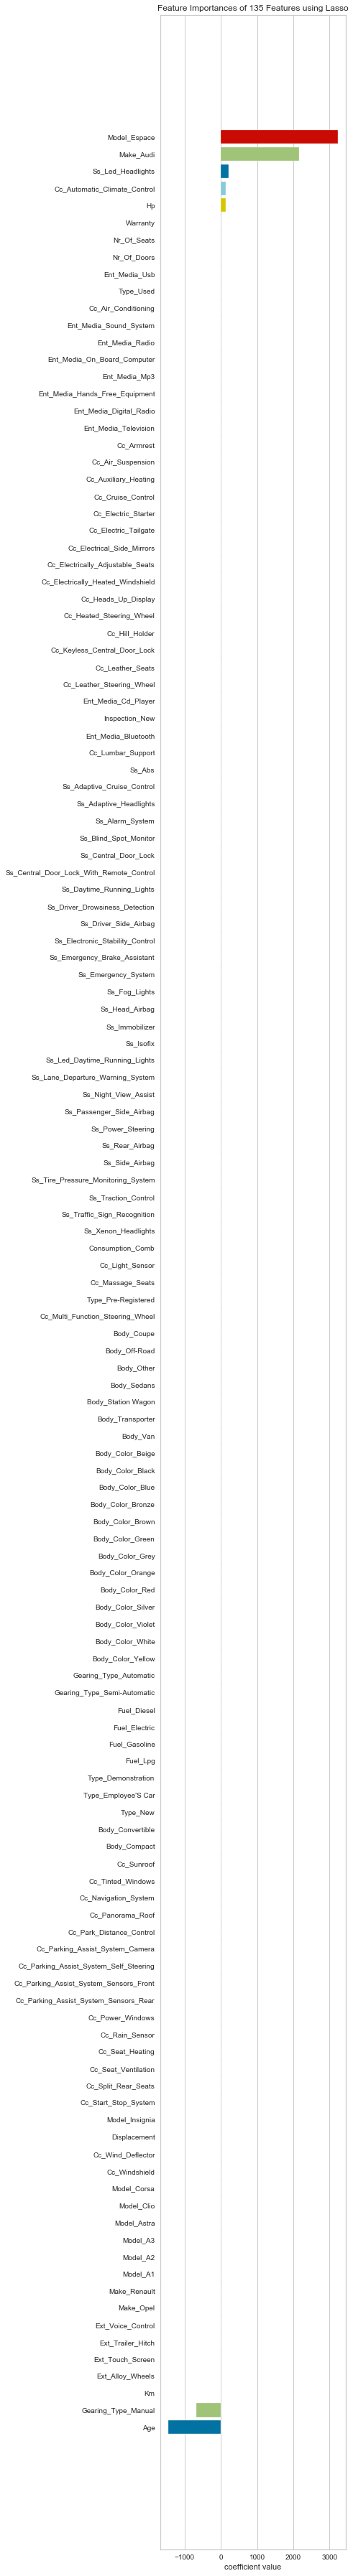

In [55]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [56]:

df2=pd.read_pickle("golden_data_not_dummy.pkl")

In [57]:
new_list=["hp", "age", "km", "model"]

In [58]:
df2.shape

(14994, 98)

In [59]:
X=df2[new_list]

In [60]:
y=df2["price"]

In [61]:

y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [62]:
X=pd.get_dummies(X)

In [63]:
X.head()

,hp,age,km,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,66.0,3,56013,1,0,0,0,0,0,0,0
1,141.0,2,80000,1,0,0,0,0,0,0,0
2,85.0,3,83450,1,0,0,0,0,0,0,0
3,66.0,3,73000,1,0,0,0,0,0,0,0
4,66.0,3,16200,1,0,0,0,0,0,0,0


In [64]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8225558949799389 
 mae: 2107.666498973084 
 mse: 9265854.3484111 
 rmse: 3043.98658808003


In [65]:
import pickle
pickle.dump(lm, open("saved_model", 'wb'))

In [66]:
richard_model=pickle.load(open("saved_model", "rb"))

In [67]:
my_dict = {
    "hp": 200,
    "age": 1,
    "km": 100000,
    "model": 'A3'
}

In [68]:
df = pd.DataFrame.from_dict([my_dict])

In [69]:
columns=X.columns
columns

Index(['hp', 'age', 'km', 'model_A1', 'model_A2', 'model_A3', 'model_Astra',
       'model_Clio', 'model_Corsa', 'model_Espace', 'model_Insignia'],
      dtype='object')

In [70]:
df = pd.get_dummies(df).reindex(columns=columns, fill_value=0)

In [71]:
df.head()

,hp,age,km,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,200,1,100000,0,0,1,0,0,0,0,0


In [72]:
pred=list(richard_model.predict(df))

In [73]:
pred

[34805.699830186975]